# <center> Project 1: Write A Data Science Blog Post </center>
## StackOverFlow Developer Survey Dataset 

### CRISP-DM Stages:
The CRISP-DM approach will be used, to maintain track of the analytic process

<ol>
    <li>Business Understanding</li>
    <li>Data Understanding</li>
    <li>Prepare Data</li>
    <li>Data Modeling</li>
    <li>Evaluate the Result</li>
</ol>

### Business Understanding

In order to understand more about professional developers, I'll answer some questions using the 2017 StackOverFlow dataset.

Questions:
<ol>
    <li>Which countries utilized Stackoverflow the most?</li>
    <li>Stackoverflow is most used by which education level?</li>
    <li>People from which education level make more salary</li>
    <li>How many people agree and disagree on make money from StackOverFlow?</li>
    <li>Which country use stackoverflow more for money?</li>
    <li>What is the ratio of people work from home and from the office?
</ol>

####  Import packages

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

### Data Understanding

#### Read the dataset 

In [3]:
# load the dataset 
df = pd.read_csv('survey_results_public.csv')
# print first 5 rows
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# load the dataset 
df_2 = pd.read_csv('survey_results_schema.csv')
# print first 5 rows
df_2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
df.shape

(51392, 154)

In [6]:
# print names of columns
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Question 1: Which countries utilized Stackoverflow the most?

#### Prepare Data

For the first question, I will use Country variable, so I started to check for null values, and I got 0, whick means there is no empty value in the country column

In [8]:
# check for null values
df['Country'].isnull().sum()

0

In [9]:
# display values in gender column
df.Country.unique()

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

#### Data Modeling

In [34]:
# display the top 10 countries
plot_country = df['Country'].value_counts()[0:10].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Country')

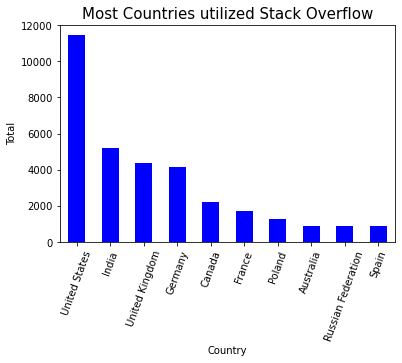

In [68]:
plot_country.plot(kind = 'bar', color = 'blue')
df['Country'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'blue')
plt.ylabel('Total')
plt.xticks(rotation=70) 
plt.title('Most Countries utilized Stack Overflow', size=15)
plt.xlabel('Country')

> From the above chart it is clear that people in United States used Stack OverFlow more than other countries, and there are only few people use Stack OverFlow in Spain, Russian Federation, and Australia.

In [82]:
# get the number of responses per country
resp_country = df['Country'].value_counts()
resp_country.head(20)

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Name: Country, dtype: int64

In [84]:
# filter dataset  
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [86]:
# Create a new dataframe to house all developers
dev_data = df[df['Professional'] == 'Professional developer']

In [87]:
dev_data.shape

(36131, 154)

In [88]:
# Aggregate and group the total number of developers by country
dev_data['Country'].value_counts()

United States                  8310
India                          3438
United Kingdom                 3302
Germany                        2767
Canada                         1605
                               ... 
Guam                              1
Burundi                           1
Ivory Coast (Cote D'Ivoire)       1
Antigua and Barbuda               1
Benin                             1
Name: Country, Length: 182, dtype: int64

In [90]:
# work location of developers in the top 10 Countries
# Create a list with the developers from the top 10 countries 
top_10_countries = list(dev_data['Country'].value_counts().head(10).index)

In [91]:
# add the results to new dataframe
dev_data_10 = dev_data[dev_data['Country'].isin(top_10_countries)]
dev_data_10.shape

(23584, 154)

In [92]:
# display values in HighestEducationParents column
df.HomeRemote.unique()

array([nan, 'More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       "It's complicated", 'A few days each month', 'About half the time'],
      dtype=object)

In [93]:
# show missing values
dev_data_10['HomeRemote'].isnull().sum()

529

I decided to drop the null values, because it is not a numerical values and because there are many missing values so it will not be accurate to fill with random values.

In [94]:
#Drop the row if it has NaN 
dev_data_10 = dev_data_10.dropna(axis=0, subset=["HomeRemote"])

In [96]:
# delete unnecessary values in HomeRemote
values = ["It's complicated"]

#drop rows that contain any value in the list
dev_data_10 = dev_data_10[dev_data_10.HomeRemote.isin(values) == False]

In [100]:
# replace the values in HomeRemote column
dev_data_10["HomeRemote"].replace({"All or almost all the time (I'm full-time remote)": "Remote",
                                   "A few days each month": "Office", "About half the time": "Both",
                                  "More than half, but not all, the time": "Remote", 
                                   "Less than half the time, but at least one day each week": "Office",
                                  "Never": "Office"}, inplace=True)
dev_data_10.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Office,"10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,Remote,Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
11,12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Office,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# get a count of location of work
dev_data_10['HomeRemote'].value_counts()

Office    18071
Remote     3226
Both        702
Name: HomeRemote, dtype: int64

In [103]:
# Group the Work location by countries 
dev_data_10_aggregate = dev_data_10.groupby(['Country', 'HomeRemote'], as_index=False)['Respondent'].count()
dev_data_10_aggregate

,Country,HomeRemote,Respondent
0,Australia,Both,19
1,Australia,Office,473
2,Australia,Remote,92
3,Canada,Both,41
4,Canada,Office,1224
5,Canada,Remote,204
6,France,Both,29
7,France,Office,1015
8,France,Remote,138
9,Germany,Both,77


In [104]:
# Sum all the repondednts by country in the top 10
dev_data_10_sum = dev_data_10['Country'].value_counts()

# Apply the function to add that to a new column 'Respondents Percentage' in the dataframe
dev_data_10_aggregate['Respondent Percentage'] = dev_data_10_aggregate.apply(lambda x: x['Respondent'] / dev_data_10_sum[x['Country']], axis=1).round(3)
dev_data_10_aggregate[['Country', 'HomeRemote', 'Respondent Percentage']]

,Country,HomeRemote,Respondent Percentage
0,Australia,Both,0.033
1,Australia,Office,0.810
2,Australia,Remote,0.158
3,Canada,Both,0.028
4,Canada,Office,0.833
5,Canada,Remote,0.139
6,France,Both,0.025
7,France,Office,0.859
8,France,Remote,0.117
9,Germany,Both,0.030


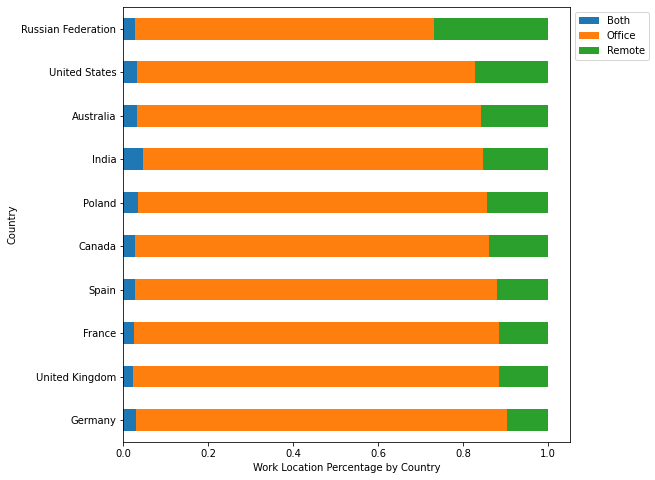

In [106]:
# pivot the data
dev_data_pivot = pd.pivot(dev_data_10_aggregate, index='Country', values='Respondent Percentage', columns='HomeRemote').sort_values('Remote', ascending=True)

# Create a function plot_data
def plot_data(pivot_data, a, b, x, y):
  '''This is a reusable function that would help us to plot the pivot data
  and produce a visualization of the same.'''

  pivot_data.plot(kind=a, stacked=True, figsize=b)
  plt.legend(loc='upper left', bbox_to_anchor=(1,1));
  x = plt.xlabel(x)
  y = plt.ylabel(y)

  return plt.show()

# Next, we vsualize our data
plot_data(dev_data_pivot, 'barh', (8, 8), 'Work Location Percentage by Country', 'Country')

> From the table it is clear that most of people work from office, and only few people work from home of both.

### Question 2: Stackoverflow is most used by which education level?

#### Prepare Data

For the second question I will use HighestEducationParents variable, so I started to check for null values

In [13]:
# check for null values
df['HighestEducationParents'].isnull().sum()

16454

I checked for all the unique values in HighestEducationParents column, to delete unnecessary values

In [14]:
# display values in HighestEducationParents column
df.HighestEducationParents.unique()

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', nan, "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'I prefer not to answer', 'Primary/elementary school',
       "I don't know/not sure", 'No education'], dtype=object)

I decided to drop the null values, because it is not a numerical values and because there are many missing values so it will not be accurate to fill with random values.

In [15]:
#Drop the row if it has NaN 
new_df1 = df.dropna(axis=0, subset=["HighestEducationParents"])

In [16]:
# check again for null values
new_df1['HighestEducationParents'].isnull().sum()

0

I deleted the unnecessary values in the HighestEducationParents column which are not usefull for the analysis process

In [17]:
# delete unnecessary values in HighestEducationParents
values = ["I don't know/not sure", 'I prefer not to answer']

#drop rows that contain any value in the list
df2 = new_df1[new_df1.HighestEducationParents.isin(values) == False]

In [18]:
# display values in HighestEducationParents column
df2.HighestEducationParents.unique()

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'Primary/elementary school', 'No education'], dtype=object)

#### Data Modeling

In [30]:
plot_education = df2['HighestEducationParents'].value_counts()[0:10].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Total Number of Users')

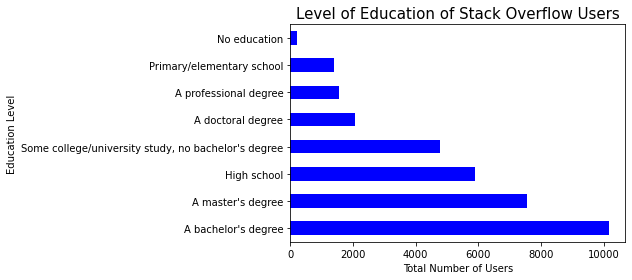

In [69]:
plot_education.plot(kind = 'barh', color = 'blue')
df2['HighestEducationParents'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'barh', color = 'blue')
plt.ylabel('Education Level')
plt.title('Level of Education of Stack Overflow Users', size=15)
plt.xlabel('Total Number of Users')

> The chart above shows that people with bachelor’s degree use Stack OverFlow more than others. Also, people with no education don’t use Stack OverFlow that much. Moreover, Stack OverFlow is also used by primary and elementary school students.

In [61]:
# the salary that people make
salary_df = df2.groupby(['HighestEducationParents'])['Salary'].mean().sort_values(ascending = False)

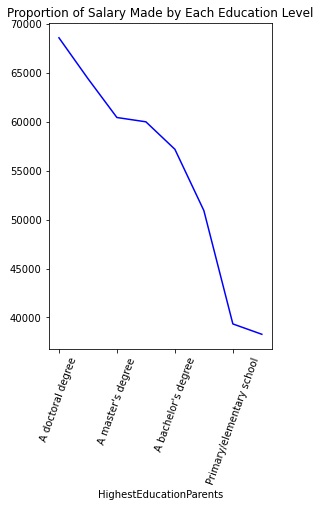

In [66]:
plt.figure(figsize=[4,6])
salary_df.plot(y=salary_df.index, x=salary_df, color = 'blue')
plt.xticks(rotation=70) 
plt.title("Proportion of Salary Made by Each Education Level");

> The above chart shows that people with a doctoral degrees make more money from Stack OverFlow.

### Question 3: How many people agree and disagree on make money from StackOverFlow?

#### Prepare Data

In [21]:
# check for null values
df['StackOverflowMakeMoney'].isnull().sum()

20330

In [22]:
# display values in StackOverflowMakeMoney column
df.StackOverflowMakeMoney.unique()

array(['Strongly disagree', 'Disagree', nan, 'Somewhat agree', 'Agree',
       'Strongly agree'], dtype=object)

I decided to drop the null values, because it is not a numerical values and because there are many missing values so it will not be accurate to fill with random values.

In [23]:
#Drop the row if it has NaN 
df_money = df.dropna(axis=0, subset=["StackOverflowMakeMoney"])

In [24]:
# check again for null values
df_money['StackOverflowMakeMoney'].isnull().sum()

0

In [25]:
# display values in StackOverflowMakeMoney column
df_money.StackOverflowMakeMoney.unique()

array(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree',
       'Strongly agree'], dtype=object)

#### Data Modeling

In [32]:
plot_money = df_money['StackOverflowMakeMoney'].value_counts()[0:5].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Number of People')

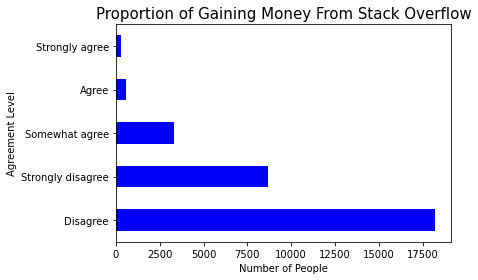

In [70]:
plot_money.plot(kind = 'barh', color = 'blue')
df2['StackOverflowMakeMoney'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'barh', color = 'blue')
plt.ylabel('Agreement Level')
plt.title('Proportion of Gaining Money From Stack Overflow', size=15)
plt.xlabel('Number of People')

> The above chart shows that most people don’t make money from stackoverflow, and there are only few people make money from Stack OverFlow.

In [38]:
# add a new column to indicate whcih country use stackoverflow more to make money
df_money['useformoney'] =  df_money['StackOverflowMakeMoney'].isin (['Strongly agree',"Agree","Somewhat agree"])

<ipython-input-38-fd0116a9e8f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_money['useformoney'] =  df_money['StackOverflowMakeMoney'].isin (['Strongly agree',"Agree","Somewhat agree"])


In [39]:
# the proporition of people use stackoverflow for money by country
country_df = df_money.groupby(['Country'])['useformoney'].mean().sort_values(ascending = False)

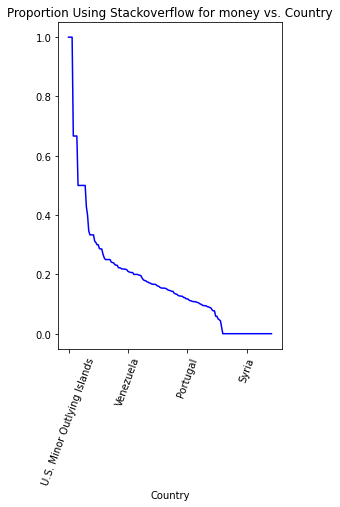

In [65]:
plt.figure(figsize=[4,6])
country_df.plot(y=country_df.index, x=country_df, color = 'blue')
plt.xticks(rotation=70) 
plt.title("Proportion of Ganing Money by Country");

> It is clear that people in United States use Stack OverFlow for money more than other countries.

## Summary:
<ul>
    <li>People in United States used Stackoverflow more than other countries</li>
    <li>There are only few people use stackoverflow in Spain, Russian Federation, and Australia</li>
    <li>people with bachelor's degree use stackoverflow more than others</li>
    <li>People with no education don't use stackoverflow that much</li>
    <li>Stackoverflow is also used by primary and elementary school students</li>
    <li>Most people don't make money from stackoverflow</li>
    <li>There are only few people make money from stackoverflow</li>
    <li>People in Unaited Satates make more salary</li>
    <li>People in United Satates use stackoverflow for money more than other countries</li>
    <li>People with a doctoral degrees make more money from Stack OverFlow</li>
    <li>Most of people work from office, and only few people work from home of both</li>
</ul>